In [1]:
# Carrega bibliotecas
using Gadfly   # Gráficos
using Color    # Cores
using Interact # Magia

In [2]:
# Funções utilizadas

# O método de Newton-Raphson poder ser definido para receber
# f(x) e f'(x) diretamente, mas como queremos analisar formas 
# diferentes da função de recursão, esta fica definida como
#     xᵢ₊₁ = f(xᵢ)
# Além disso, recebe também um número real 'x₀' que é usado
# como chute inicial pro método e pode receber um número
# real 'ϵ' que é usado como tolerância, caso contrário
# é utilizado o valor eps() = 2.22e-16 (que é a distância
# entre o 1 e o próximo valor representável em ponto 
# flutuante com 64bits). O mesmo vale pras funções seguintes.
function newtonraphson(f::Function, x₀::Real; ϵ::Real = eps())
    
    # Iteração inicial para poder calcular o erro
    x₁ = f(x₀)
    e  = abs(x₁ - x₀)
    
    # Já inicia o contador de iterações com 1
    n = 1 
    
    # Enquanto o erro for maior que a tolerância
    while e > ϵ
        
        # Realiza mais uma iteração
        x₀ = x₁
        x₁ = f(x₀)
        
        # Atualiza o erro
        e  = abs(x₁ - x₀)
        
        # Atualiza o contador
        n += 1
    end
    
    return x₁, n
end

# Método de Bisseção
# Recebe uma função 'f' e dois reais 'a' e 'b' tal que a 
# raiz de 'f' esteja entre eles.
function bisseção(f::Function, a::Real, b::Real; ϵ = eps())
    fa = f(a)
    fb = f(b)
    
    # Verifica se f(a) e f(b) têm sinais opostos
    # e dá erro caso contrário
    @assert sign(fa) != sign(fb) "f(a) e f(b) devem ter sinais diferentes!"
    
    # Calcula o erro inicial
    e  = abs(b - a)
    
    # Calcula o ponto médio e o valor da função nele
    m  = 0.5*(a + b)
    fm = f(m)
    
    # Inicia o contador com zero, já que não foi feito nada
    n = 0
    
    # Enquanto o erro for maior que a tolerância
    while e > ϵ
        
        # Atualiza o lado em que a função tem o mesmo sinal
        # que no novo ponto, para garantir que a raíz
        # esteja sempre entre 'a' e 'b'
        if sign(fa) == sign(fm)
            a  = m
            fa = fm
        else
            b = m
            fb = fm
        end
        
        # Atualiza o erro
        e  = abs(b - a)
        
        # Calcula novo ponto médio e o valor da função nele
        m  = 0.5*(a + b)
        fm = f(m)
        
        # Atualiza o contador
        n += 1
    end
    
    return m, n
end

# Método de Secantes
# Recebe uma função 'f' e dois reais 'x₀' e 'x₁' que serão
# utilizados como chutes iniciais pelo método.
function secantes(f::Function, x₀::Real, x₁::Real; ϵ = eps())
    
    # Iteração inicial para poder calcular o erro
    x₂ = x₁ - f(x₁)*(x₁ - x₀)/(f(x₁) - f(x₀))
    e = abs(x₂ - x₁)
    
    # Já inicia o contador de iterações com 1
    n = 1
    
    # Enquanto o erro for maior que a tolerância
    while e > ϵ
        
        # Realiza mais uma iteração
        x₀ = x₁
        x₁ = x₂
        x₂ = x₁ - f(x₁)*(x₁ - x₀)/(f(x₁) - f(x₀))
        
        # Atualiza o erro
        e = abs(x₂ - x₁)

        # Atualiza o contador
        n += 1
    end
    
    return x₂, n
end

# Método Regula Falsi
# (Variação conhecida como Método de Illinois)
# Recebe uma função 'f' e dois reais 'a' e 'b' tal que a 
# raiz de 'f' esteja entre eles.
function regulafalsi(f::Function, a::Real, b::Real; ϵ = eps())
    fa = f(a)
    fb = f(b)
    
    # Verifica se f(a) e f(b) têm sinais opostos
    # e dá erro caso contrário
    @assert sign(fa) != sign(fb) "f(a) e f(b) devem ter sinais diferentes!"
    
    # Calcula o erro inicial
    e = abs(b - a)
    
    # Inicializa constantes utilizadas dentro do laço.
    # Isso é necessário porque se elas forem inicializadas
    # dentro do laço, elas não serão visíveis fora dele e
    # portanto não há como retorná-las no final da função
    
    c    = 0.0     # Novo ponto calculado
    side = Symbol  # Símbolo que indica o último lado que foi substituído
    
    # Inicia o contador com zero, já que não foi feito nada
    n = 0
    
    # Enquanto o erro for maior que a tolerância
    while e > ϵ
        # É aqui que o método Regula Falsi difere principalmente
        # do de bisseção. Ao invés de se tomar 'c' como
        # o ponto médio entre 'a' e 'b', é feita uma
        # iteração do método de secantes.
        c  = b - fb*(b - a)/(fb - fa) 
        fc = f(c)

        # Atualiza o lado em que a função tem o mesmo sinal
        # que no novo ponto, para garantir que a raíz
        # esteja sempre entre 'a' e 'b'.
        # Além disso, caso um lado seja atualizado duas vezes
        # seguidas, o outro é alterado, para garantir que 
        # ambos sejam atualizados e que o comprimento do
        # intervalo tenda a zero.
        if sign(fa) == sign(fc)
            a  = c
            fa = fc
            
            if side == :a
                fb /= 2
            end
            side = :a
        else
            b  = c
            fb = fc
            
            if side == :b
                fa /= 2
            end
            side = :b
        end
        
        # Atualiza o erro
        e  = abs(b - a)
        
        # Atualiza o contador
        n += 1
    end
    
    return c, n
end

regulafalsi (generic function with 1 method)

## 1

### a) 
Como $S_{3}$ é a primeira aproximação de $1/S_{2}$, vamos montar uma expressão de forma que $x$ convirja para $1/S_{2}$, sendo que $x_{0} = S_{3}$. Então
   $$ \frac{1}{x}  = S_{2}$$
   $$ f(x) = \frac{1}{x} - S_{2} $$
   $$ f'(x) = -\frac{1}{x^{2}}$$
   
   E portanto
   $$ x_{i+1} = x_{i} + \frac{\frac{1}{x} - S_{2}}{\frac{1}{x^2}}$$
   
   Reorganizando
   $$ x_{i+1} = x_{i}\left(2 - S_2 x_i \right)$$
   
   Como queremos $S_1/S_2$ e substituindo $x_0$
   $$ S_6 = S_1 x_1 = S_1 S_3\left(2 - S_2 S_3 \right)$$


### b)

In [3]:
x₀ = 0.01

@printf "1/R\t\t1/R (calculado)\t\tn\n"

for R = 1:10
    f(x) = x*(2 - R*x)
    x, n = newtonraphson(f, x₀; ϵ = 1e-7)
    
    @printf "%f\t%f\t\t%d\n" 1/R x n
end

1/R		1/R (calculado)		n
1.000000	1.000000		12
0.500000	0.500000		11
0.333333	0.333333		10
0.250000	0.250000		10
0.200000	0.200000		10
0.166667	0.166667		9
0.142857	0.142857		9
0.125000	0.125000		9
0.111111	0.111111		9
0.100000	0.100000		9


### c)

In [4]:
a = 0.01
b = 2.0

@printf "1/R\t\t1/R (calculado)\t\tn\n"
for R = 1:10    
    f(x) = 1/x - R
    m, n = bisseção(f, a, b; ϵ = 1e-7)

    @printf "%f\t%f\t\t%d\n" 1/R m n
end

1/R		1/R (calculado)		n
1.000000	1.000000		25
0.500000	0.500000		25
0.333333	0.333333		25
0.250000	0.250000		25
0.200000	0.200000		25
0.166667	0.166667		25
0.142857	0.142857		25
0.125000	0.125000		25
0.111111	0.111111		25
0.100000	0.100000		25


## 2

### a)

Se queremos calcular a raiz de $a$
$$ x = \sqrt{a} $$

podemos fazer
$$ x^2 = a $$

Então 
$$ f(x) = x^2 - a $$
$$ f'(x) = 2x $$

portanto* 
$$ x_{i+1} = x_i - \frac{x_i^2 - a}{2x_i} $$

ou
$$ x_{i+1} = \frac{1}{2}\left(x_i + \frac{a}{x_i}\right) $$

\* Na lista as expressões estavam com $a = 2$

### b)

In [5]:
x₀ = 1.0
a  = 2.0

f1(x) = x - (x*x - a)/(2x)
f2(x) = 0.5(x + a/x)

@printf "√a\t\tx₁\t\tn\n"

x₁, n = newtonraphson(f1, x₀; ϵ = 1e-7)
@printf "%f\t%f\t%d\n" √a x₁ n

x₁, n = newtonraphson(f2, x₀; ϵ = 1e-7)
@printf "%f\t%f\t%d\n" √a x₁ n

√a		x₁		n
1.414214	1.414214	5
1.414214	1.414214	5


## 3

 $$ \frac{T(x, t) - T_e}{T_i - T_e} = \mathrm{erf}\left( \frac{x}{2\sqrt{\alpha t}} \right)$$
 
 onde
 $$ \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt $$
 
 Reorganizando
 
 $$ T(x, t) = T_e + (T_i - T_e)\mathrm{erf}\left( \frac{x}{2\sqrt{\alpha t}} \right) $$
 
 E queremos que 
 $$ T(x, 60 \text{ dias}) = 0^\circ\mathrm{C} $$
 
 Com
 $$ T_i = 20^\circ\text{C} $$ 
 $$ T_e = -15^\circ\text{C} $$
 $$ \alpha = 0.138 \times 10^{-6}\, \mathrm{m}^2/\mathrm{s} $$

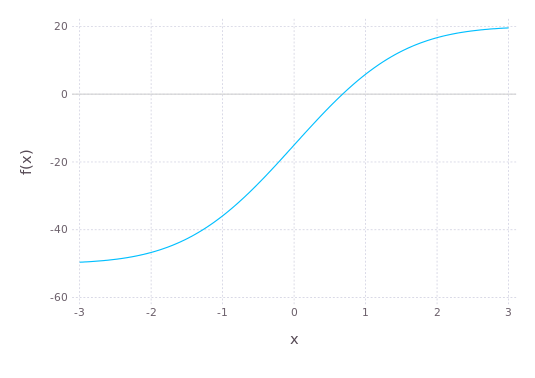

In [6]:
Tᵢ =  20         # ºC
Tₑ = -15         # ºC
α  = 0.138e-6    # m²/s
t  = 60*24*60*60 # s

T(x) = Tₑ + (Tᵢ - Tₑ)*erf(x/(2sqrt(α*t)))

plot(T, -3, 3, 
     yintercept=[0], 
     Geom.hline(color="lightgray"))

In [7]:
@printf "Método\t\tx (m)\t\tn\n"

# Para não termos que calcular a derivada,
# podemos usar o método de secantes ou bisseção
x, n = secantes(T, 0, 1; ϵ = 1e-7)
@printf "%s\t%f\t%d\n" "Secantes" x  n

x, n = bisseção(T, 0, 1; ϵ = 1e-7)
@printf "%s\t%f\t%d\n" "Bisseção" x  n


Método		x (m)		n
Secantes	0.676962	5
Bisseção	0.676962	24


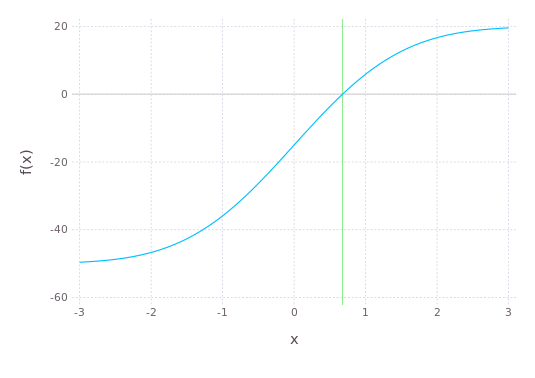

In [8]:
# Verificar visualmente que T(x) = 0
plot(T, -3, 3, 
     xintercept=[x], 
     Geom.vline(color="lightgreen"), 
     yintercept=[0], 
     Geom.hline(color="lightgray"))

## 4


Tendo as expressões para a temperatura do lago nas duas fases

$$ T_S (x, t) = T_e + (T_f - T_e)\frac{\mathrm{erf}\left( \frac{x}{2\sqrt{\alpha_s t}} \right)}{\mathrm{erf}(\eta)} ,\quad 0 \leq x \leq d $$

$$ T_L (x, t) = T_i - (T_i - T_f)\frac{\mathrm{erfc}\left( \frac{x}{2\sqrt{\alpha_L t}} \right)}{\mathrm{erfc}\left( \eta\sqrt{\alpha_S/\alpha_L} \right)},\quad x \gt d $$

### a)
Podemos calcular $d$
$$ d = 2\eta\sqrt{\alpha_S t} $$

calculando primeiro $\eta$ como solução da equação

\begin{equation}
        f(\eta) = \frac{e^{-\eta^2}}{\mathrm{erf}(\eta)} - \sqrt{\alpha_S/\alpha_L}\frac{k_L}{k_S}\frac{T_i - T_f}{T_f - T_e}\frac{e^{-\eta^2\alpha_S/\alpha_L}}{\mathrm{erfc}\left( \eta\sqrt{\alpha_S/\alpha_L} \right)} - \frac{\eta L\sqrt{\pi}}{c_{pS}(T_f - T_e)}
\end{equation}

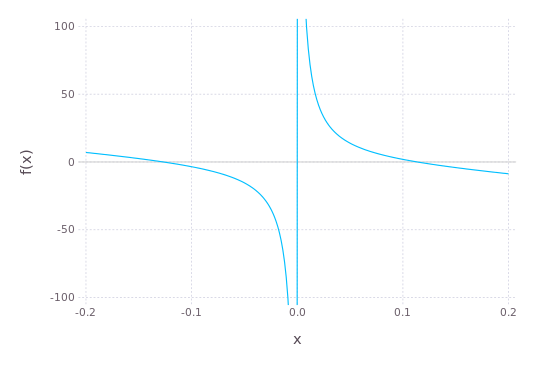

In [9]:
kS , kL  = 2.25    , 0.5675   # Wm⁻¹K⁻¹
ρS , ρL  = 0.9175e6, 1e6      # g m⁻³
cpS, cpL = 2.027   , 4.204    # J g⁻¹K⁻¹

αS = kS/(ρS*cpS)
αL = kL/(ρL*cpL)
α  = αS/αL       # Aparece muito na função

L  = 334  # J g⁻¹
Tᵢ =   5  # ºC
Tₑ =  -5  # ºC
Tf =   0  # ºC

f(η) = exp(-η*η)/erf(η) - √α*kL/kS*(Tᵢ - Tf)/(Tf - Tₑ)*exp(-η*η*α)/erfc(η*√α) - η*L*√π/cpS/(Tf - Tₑ)

# Há uma singularidade em η = 0 e mais duas raízes
# Queremos somente a positiva
plot(f, -0.2, 0.2, 
     Scale.y_continuous(minvalue=-100, maxvalue=100), 
     yintercept=[0], 
     Geom.hline(color="lightgray"))

Método		η (m)		n
Bisseção	0.113847	49
Secantes	0.113847	7
Regula Falsi	0.113847	9


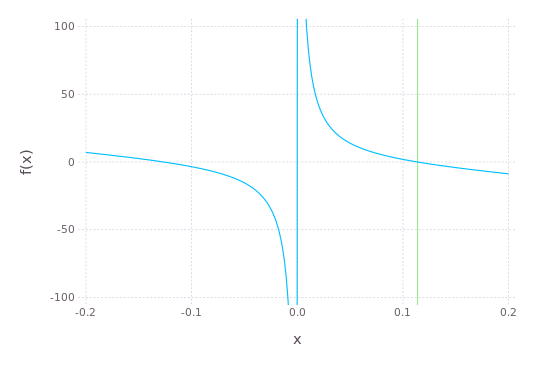

In [10]:
@printf "Método\t\tη (m)\t\tn\n"

η, n = bisseção(f, 0.1, 0.2)
@printf "%s\t%f\t%d\n" "Bisseção" η n

η, n = secantes(f, 0.1, 0.2)
@printf "%s\t%f\t%d\n" "Secantes" η n

η, n = regulafalsi(f, 0.1, 0.2)
@printf "%s\t%f\t%d\n" "Regula Falsi" η n

plot(f, -0.2, 0.2, 
     Scale.y_continuous(minvalue=-100, maxvalue=100), 
     xintercept=[η], 
     Geom.vline(color="lightgreen"))

In [11]:
# Função que calcula o valor de 'd'
# ficou com esse nome estranho porque usar
# só 'd' dá uns probleminhas
funcd(t) = 2η*sqrt(αS*t)

@printf "t (dias)\td (m)\n"

t = 5*24*3600 # segundos
@printf "%d\t\t%f\n" 5 funcd(t)

t = 20*24*3600 # segundos
@printf "%d\t\t%f\n" 20 funcd(t)

t (dias)	d (m)
5		0.164609
20		0.329218


### b)

    Tendo os dados, podemos plotar os gráficos

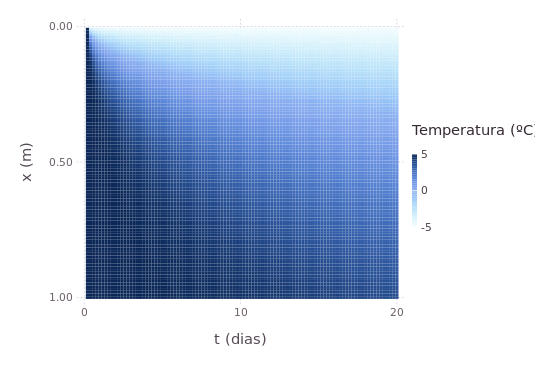

In [12]:
TS(x, t) = Tₑ + (Tf - Tₑ)*erf(x/2/sqrt(αS*t))/erf(η)
TL(x, t) = Tᵢ - (Tᵢ - Tf)*erfc(x/2/sqrt(αL*t))/erfc(η*√α)

# Função que decide qual equação utilizar baseado
# na posição x
function T(x, t, d)
    if 0 <= x <= d
        return TS(x, t)
    else
        return TL(x, t)
    end
end

n = 100         # Tamanho do lado da matriz
M = zeros(n, n) # Cria uma matriz nxn preenchida com zeros

# Preenche uma matriz nxn onde cada coluna representa
# um instante de tempo 't' e cada linha, uma posição 'x'.
# O valor de cada elemento é a temperatura naquele ponto (x, t).
for j = 1:n
    t = 20*24*3600*(j - 1)/n
    d = funcd(t)

    
    for i = 1:n
        x = i/n
    
        M[i, j] = T(x, t, d)
    end
    
end

# Escala de azuis
blues = colormap("Blues")

# Imprime uma visualização da matriz
spy(M, Scale.x_continuous(labels = j -> @sprintf "%d" 20*(j - 1)/n), 
       Guide.xlabel("t (dias)"), 
       Scale.y_continuous(labels = i -> @sprintf "%.2f" i/n), 
       Guide.ylabel("x (m)"),
       Scale.ContinuousColorScale(p -> blues[int(99p + 1)]),         
       Guide.colorkey("Temperatura (ºC)"))

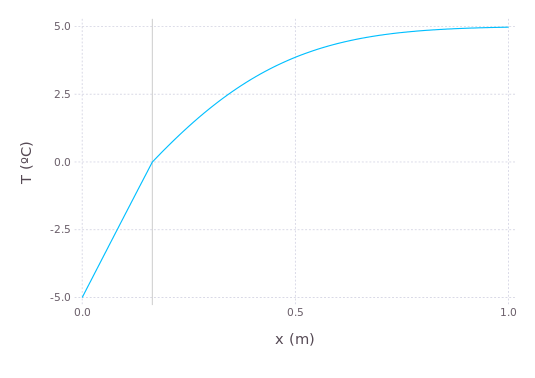

In [13]:
# Temperatura em função da profundidade após 5 dias de nevasca
t = 5*24*3600 # s
d = funcd(t)  # m

plot(x -> T(x, t, d), 0, 1, 
     xintercept=[d], 
     Geom.vline(color="lightgray"),
     Guide.xlabel("x (m)"), 
     Guide.ylabel("T (ºC)"),
     Guide.yticks(ticks=[-5, -2.5, 0, 2.5, 5]))


## 5

   Queremos resolver a equação
    $$f(T_b) = \pi dh(T_b - T_a) + \pi d \epsilon \sigma(T_b^4 - T_s^4) - P = 0 $$
    
   onde 
   $$ P = IR^2 $$

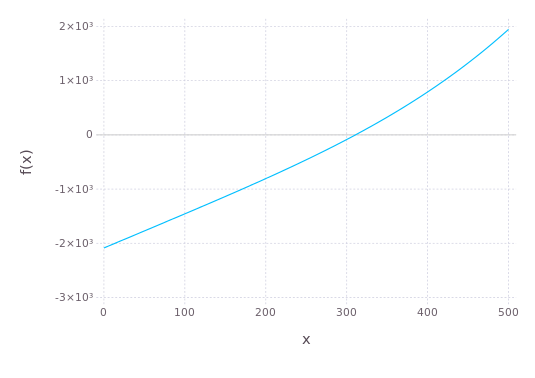

In [14]:
σ = 5.67e-8 # Wm⁻²K⁻⁴
d = 0.1     # m
Ta = 298.15 # K
Ts = 298.15 # K
h  = 20.0   # Wm⁻²K⁻¹
ϵ  = 0.8
P  = 100.0  # Wm⁻¹

f(Tb)  = π*d*(h*(Tb - Ta) + ϵ*σ*(Tb^4 - Ts^4)) - P
df(Tb) = π*d*(h + ϵ*σ*4Tb^3)

plot(f, 0, 500, 
     yintercept=[0], 
     Geom.hline(color="lightgray"))

Método		Tb (K)		Tb (ºC)		n
Newton-Raphson	310.819504	12.669504	4
Bisseção	310.819504	12.669504	29
Secantes	310.819504	12.669504	5
Regula Falsi	310.819504	12.669504	6


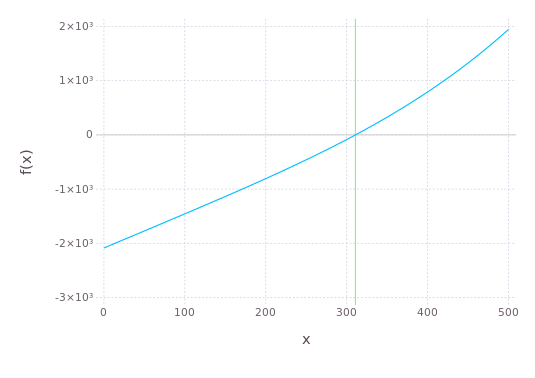

In [15]:
@printf "Método\t\tTb (K)\t\tTb (ºC)\t\tn\n"

g(Tb) = Tb - f(Tb)/df(Tb)
Tb, n = newtonraphson(g, 300; ϵ = 1e-7)
@printf "%s\t%f\t%f\t%d\n" "Newton-Raphson" Tb Tb-298.15 n

Tb, n = bisseção(f, 300, 350; ϵ = 1e-7)
@printf "%s\t%f\t%f\t%d\n" "Bisseção" Tb Tb-298.15 n

Tb, n = secantes(f, 300, 350; ϵ = 1e-7)
@printf "%s\t%f\t%f\t%d\n" "Secantes" Tb Tb-298.15 n

Tb, n = regulafalsi(f, 300, 350; ϵ = 1e-7)
@printf "%s\t%f\t%f\t%d\n" "Regula Falsi" Tb Tb-298.15 n

plot(f, 0, 500, 
     xintercept=[Tb], 
     Geom.vline(color="lightgreen"), 
     yintercept=[0], 
     Geom.hline(color="lightgray"))

## 6



In [16]:
# Definir um novo tipo Gás (como float, int, etc)
# pro programa ficar mais flexível
immutable Gás
    A₀::Float64 # kPa m⁶ kmol⁻²
    B₀::Float64 # m³ kmol⁻¹
    a::Float64  # m⁻³ kmol
    b::Float64  # m⁻³ kmol
    c::Float64  # m³ K³ kmol⁻¹  
end

# Criar alguns gases
ar  = Gás(131.8441, 0.04611,  0.01931, -0.001101, 4.34e4)
Ar  = Gás(130.7802, 0.03931,  0.02328,       0.0, 5.99e4)
CO₂ = Gás(507.2836, 0.10476,  0.07132,   0.07235,  6.6e5)
He  = Gás(  2.1886, 0.01400,  0.05984,       0.0,    4e1)
H₂  = Gás( 20.0117, 0.02096, -0.00506,  -0.04359, 5.04e2)
N₂  = Gás(136.2315, 0.05046,  0.02617,  -0.00691,  4.2e4)
O₂  = Gás(151.0857, 0.04624,  0.02562,  0.004208,  4.8e4)

Gás(151.0857,0.04624,0.02562,0.004208,48000.0)

In [17]:
R = 8.314462 # m³ kPa K⁻¹ kmol⁻¹

# Agora as funções podem ser genéricas e
# depender diretamente do tipo do gás
function β(g::Gás, t)
    A₀ = g.A₀
    B₀ = g.B₀
    a  = g.a
    b  = g.b
    c  = g.c  
    
    R*t*B₀ - A₀ - R*c/t^2
end

function γ(g::Gás, t)
    A₀ = g.A₀
    B₀ = g.B₀
    a  = g.a
    b  = g.b
    c  = g.c  

    -R*t*B₀*b + A₀*a - R*c*B₀/t^2
end

function δ(g::Gás, t)
    A₀ = g.A₀
    B₀ = g.B₀
    a  = g.a
    b  = g.b
    c  = g.c  

    R*B₀*b*c/t^2
end

# p e T ainda precisam ser escolhidos, então são argumentos da função
function f(g::Gás, p, t, v)
    R*t/v + β(g, t)/v^2 + γ(g, t)/v^3 + δ(g, t)/v^4 - p
end

function df(g::Gás, p, t, v) 
    -R*t/v^2 - 2β(g, t)/v^3 - 3γ(g, t)/v^4 - 4δ(g, t)/v^5
end


df (generic function with 2 methods)

In [18]:
# Para o Argônio
for t in [100; 150; 200; 250; 300; 400; 500; 600; 800; 1000]
    for p in [1; 5; 10; 20; 40; 60; 80; 100; 200; 300; 400; 500]
        p *= 1e2 # 1 bar = 100 kPa e queremos p em kPa
        
        # Precisamos de uma função que dependa só de v
        # Ar, p e t já estão definidos, então aqui estamos
        # passando valores
        V(v) = v - f(Ar, p, t, v)/df(Ar, p, t, v)
        
        # Usa a equação do gás ideal para gerar o chute inicial
        v₀   = R*t/p
        v, n = newtonraphson(V, v₀; ϵ = 1e-12)
        
        # Calcula z
        z = v/v₀
        
        @printf "%6.4f " z
    end
    @printf "\n"
end


0.9781 0.8789 0.6969    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf 
0.9933 0.9657 0.9294 0.8489 0.6105    Inf    Inf    Inf    Inf    Inf 0.7254 0.8688 
0.9972 0.9859 0.9716 0.9428 0.8840 0.8245 0.7667 0.7148 0.6576 0.7569 0.8746 0.9922 
0.9987 0.9934 0.9869 0.9742 0.9498 0.9273 0.9072 0.8901 0.8575 0.8983 0.9718 1.0564 
0.9994 0.9970 0.9940 0.9883 0.9779 0.9689 0.9614 0.9556 0.9512 0.9821 1.0345 1.0978 
1.0000 0.9999 0.9998 0.9997 1.0001 1.0011 1.0028 1.0050 1.0247 1.0560 1.0955 1.1402 
1.0002 1.0009 1.0018 1.0037 1.0077 1.0120 1.0165 1.0213 1.0488 1.0810 1.1165 1.1543 
1.0003 1.0013 1.0026 1.0052 1.0105 1.0160 1.0216 1.0273 1.0572 1.0891 1.1222 1.1562 
1.0003 1.0015 1.0029 1.0059 1.0118 1.0177 1.0236 1.0295 1.0591 1.0887 1.1182 1.1474 
1.0003 1.0014 1.0028 1.0056 1.0113 1.0169 1.0225 1.0280 1.0555 1.0824 1.1089 1.1349 


In [19]:
# Para o Nitrogênio
for t in [70; 80; 90; 100; 120; 140; 160; 180; 200; 250; 300; 350; 400; 500; 600; 800; 1000]
    for p in [1; 5; 10; 20; 40; 60; 80; 100; 200; 300; 400; 500]
        p *= 1e2 # 1 bar = 100 kPa e queremos p em kPa
        
        # Precisamos de uma função que dependa só de v
        # N₂, p e t já estão definidos, então aqui estamos
        # passando valores
        V(v) = v - f(Ar, p, t, v)/df(Ar, p, t, v)
        
        # Usa a equação do gás ideal para gerar o chute inicial
        v₀   = R*t/p
        v, n = newtonraphson(V, v₀; ϵ = 1e-12)
        
        # Calcula z
        z = v/v₀
        
        @printf "%6.4f " z
    end
    @printf "\n"
end

0.9337    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf 
0.9569 0.7093    Inf    Inf    Inf    Inf    NaN    Inf    Inf    Inf    Inf    Inf 
0.9700 0.8241    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf 
0.9781 0.8789 0.6969    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf 
0.9872 0.9325 0.8539 0.5898    Inf    Inf    Inf    Inf    Inf    Inf    Inf    Inf 
0.9918 0.9578 0.9122 0.8057    Inf    Inf    Inf    Inf    Inf    Inf    Inf 0.8249 
0.9944 0.9718 0.9424 0.8791 0.7237 0.2093    Inf    Inf    Inf    Inf 0.7623 0.9034 
0.9961 0.9803 0.9602 0.9186 0.8288 0.7282 0.6168 0.5192    Inf 0.6865 0.8237 0.9548 
0.9972 0.9859 0.9716 0.9428 0.8840 0.8245 0.7667 0.7148 0.6576 0.7569 0.8746 0.9922 
0.9987 0.9934 0.9869 0.9742 0.9498 0.9273 0.9072 0.8901 0.8575 0.8983 0.9718 1.0564 
0.9994 0.9970 0.9940 0.9883 0.9779 0.9689 0.9614 0.9556 0.9512 0.9821 1.0345 1.0978 
0.9998 0.9988 0.9977 0.9956 0.9922 0.9897 0.9881 0.9875 0.9986 1.

Nota: como as funções são instáveis, a escolha de chute inicial importa muito para o resultado final, então a região nas tabelas em que os resultados são razoáveis (ou pelo menos algum número) depende do seu chute inicial.

## 7
### a)
Temos a expressão
    $$ \rho(\lambda, T) = 8\pi hc \frac{1}{e^{\frac{hc}{\lambda kT}} - 1}\frac{1}{\lambda^5}$$

e queremos substituir por 
    $$ l = \frac{\lambda kT}{hc} $$
logo
    $$ \rho(l, T) = 8\pi hc \left[ \frac{kT}{hc} \right]^5 \frac{1}{e^{1/l} - 1}\frac{1}{l^5} $$

Queremos calcular
    $$ 0 = \frac{d\rho}{d\lambda} = \frac{d\rho}{dl}\frac{dl}{d\lambda} $$
então
    $$ \frac{d\rho}{d\lambda} = 8\pi hc \left[ \frac{kT}{hc} \right]^5\left[ \frac{kT}{hc} \right] \left[ \frac{1}{l^5}\left[ -\frac{1}{[e^{1/l} - 1]^2} \right]e^{1/l}\left[- \frac{1}{l^2} \right] - \frac{5}{l^6}\frac{1}{e^{1/l} - 1} \right ]$$
   
   $$ = \frac{1}{l^7}\frac{e^{1/l}}{\left[e^{1/l} - 1\right]^2} - \frac{5}{l^6}\frac{1}{e^{1/l} - 1}$$

   $$ = \frac{(1/l)e^{1/l}}{e^{1/l} - 1} - 5 = 0 $$
   
que é a equação que precisamos resolver

### b)
Primeiro vamos ver a f

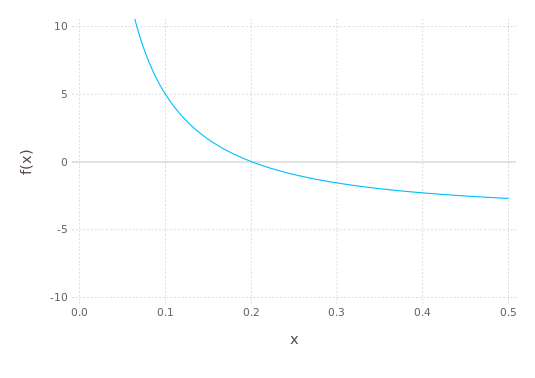

In [20]:
f(l) = (1/l)*exp(1/l)/(exp(1/l) - 1) - 5
plot(f, 0, 0.5, Scale.y_continuous(minvalue=-10, maxvalue=10), yintercept=[0], Geom.hline(color="lightgray"))

In [21]:
@printf "Método\t\tl\t\tn\n"

l, n = bisseção(f, 0.1, 0.3; ϵ = 1e-7)
@printf "%s\t%f\t%d\n" "Bisseção" l n

l, n = secantes(f, 0.1, 0.3; ϵ = 1e-7)
@printf "%s\t%f\t%d\n" "Secantes" l n

l, n = regulafalsi(f, 0.1, 0.3; ϵ = 1e-7)
@printf "%s\t%f\t%d\n" "Regula Falsi" l n

Método		l		n
Bisseção	0.201405	21
Secantes	0.201405	8
Regula Falsi	0.201405	10


### c)

Já obtemos então a solução para
$$ l_{max} = \frac{\lambda_{max}kT}{hc}$$

lembrando que $\lambda_{max}T = c_W$, podemos obter $h/k$
$$ \frac{h}{k} = \frac{c_W}{c}\frac{1}{l_{max}} $$

Por outro lado, usando
$$ \sigma =  \frac{8\pi^5}{15}\frac{k^4}{(hc)^3}\frac{c}{4}$$

podemos reorganizar

$$ k = \left[\frac{h}{k}\right]^3\frac{15c^2}{2\pi^5}\sigma $$

e finalmente
$$ k = \frac{15}{2c\pi^5}\frac{c_W^3 \sigma}{l_{max}^3} $$

$$ h = \frac{15}{2c^2\pi^5}\frac{c_W^4 \sigma}{l_{max}^4} $$

In [22]:
cW = 2.898e-3  # m K
σ  = 5.67e-8   # W m⁻²
c  = 299792458 # m s⁻¹

k = 15/(2*c*π^5)*cW^3*σ/l^3
h = 15/(2*c^2*π^5)*cW^4*σ/l^4

@printf "\t\tk (JK⁻¹)\th (Js)\n"
@printf "Valor oficial\t%.6e\t%.6e\n" 1.3806488e-23 6.62606957e-34
@printf "Valor calculado\t%.6e\t%.6e\n" k h

		k (JK⁻¹)	h (Js)
Valor oficial	1.380649e-23	6.626070e-34
Valor calculado	1.380884e-23	6.627719e-34
